In [1]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from scipy.cluster.vq import whiten, kmeans2

In [3]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': 'be5abab7dd574861a85e6c39f7a315ca' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [4]:
leagues = requests.get('http://api.football-data.org/v1/soccerseasons', headers = { 'X-Auth-Token': 'c52b7825851b4357af3e06c1888152f0' }).json()

In [5]:
leagues[1]

{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/soccerseasons/445/fixtures'},
  'leagueTable': {'href': 'http://api.football-data.org/v1/soccerseasons/445/leagueTable'},
  'self': {'href': 'http://api.football-data.org/v1/soccerseasons/445'},
  'teams': {'href': 'http://api.football-data.org/v1/soccerseasons/445/teams'}},
 'caption': 'Premier League 2017/18',
 'currentMatchday': 18,
 'id': 445,
 'lastUpdated': '2017-12-18T22:10:09Z',
 'league': 'PL',
 'numberOfGames': 380,
 'numberOfMatchdays': 38,
 'numberOfTeams': 20,
 'year': '2017'}

In [6]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/455/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/745/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/745/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/745'}},
  'code': 'LEG',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/en/thumb/0/02/Club_Deportivo_Leganés.png/180px-Club_Deportivo_Leganés.png',
  'name': 'CD Leganes',
  'shortName': 'Leganes',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/263/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/263/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/263'}},
  'code': 'ALA',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/en/2/2e/Deportivo_Alaves_logo.svg',
  'name': 'Deportivo Alavés',
  'shortName': 'Alaves',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/95/fixtures'},
   'players': {'href': 'http://

In [80]:
for team in teams:
    players = call_api(team['_links']['players']['href'], 'players')
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    goal = 0
    loss = 0 
    for f in fixtures:
        if f['status'] == 'FINISHED':
            matches += 1
            if team['name'] == f['homeTeamName']:
                goal += f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0            
                loss += 1 if f['result']['goalsHomeTeam'] < f['result']['goalsAwayTeam'] else 0
            elif team['name'] == f['awayTeamName']:
                goal += f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0           
                loss += 1 if f['result']['goalsAwayTeam'] < f['result']['goalsHomeTeam'] else 0
    print('Team "{}",{} goal, {} loss'.format(team['name'], goal, loss))
    team['goal'] = goal
    team['loss'] = loss

Team "CD Leganes",12 goal, 7 loss
Team "Deportivo Alavés",12 goal, 12 loss
Team "Valencia CF",36 goal, 2 loss
Team "UD Las Palmas",13 goal, 11 loss
Team "RC Celta de Vigo",27 goal, 8 loss
Team "Real Sociedad de Fútbol",28 goal, 6 loss
Team "Girona FC",20 goal, 5 loss
Team "Club Atlético de Madrid",30 goal, 1 loss
Team "Sevilla FC",31 goal, 6 loss
Team "RCD Espanyol",13 goal, 7 loss
Team "Athletic Club",16 goal, 6 loss
Team "Getafe CF",20 goal, 6 loss
Team "FC Barcelona",51 goal, 0 loss
Team "Real Betis",25 goal, 7 loss
Team "RC Deportivo La Coruna",18 goal, 9 loss
Team "Real Madrid CF",47 goal, 3 loss
Team "Levante UD",15 goal, 5 loss
Team "Villarreal CF",23 goal, 6 loss
Team "Málaga CF",13 goal, 11 loss
Team "SD Eibar",18 goal, 7 loss


In [82]:
team_for_pd = []
for team in teams:
    team_for_pd.append({'name': team['name'],'goal': team['goal'], 'loss': team['loss']})
team_for_pd

[{'goal': 12, 'loss': 7, 'name': 'CD Leganes'},
 {'goal': 12, 'loss': 12, 'name': 'Deportivo Alavés'},
 {'goal': 36, 'loss': 2, 'name': 'Valencia CF'},
 {'goal': 13, 'loss': 11, 'name': 'UD Las Palmas'},
 {'goal': 27, 'loss': 8, 'name': 'RC Celta de Vigo'},
 {'goal': 28, 'loss': 6, 'name': 'Real Sociedad de Fútbol'},
 {'goal': 20, 'loss': 5, 'name': 'Girona FC'},
 {'goal': 30, 'loss': 1, 'name': 'Club Atlético de Madrid'},
 {'goal': 31, 'loss': 6, 'name': 'Sevilla FC'},
 {'goal': 13, 'loss': 7, 'name': 'RCD Espanyol'},
 {'goal': 16, 'loss': 6, 'name': 'Athletic Club'},
 {'goal': 20, 'loss': 6, 'name': 'Getafe CF'},
 {'goal': 51, 'loss': 0, 'name': 'FC Barcelona'},
 {'goal': 25, 'loss': 7, 'name': 'Real Betis'},
 {'goal': 18, 'loss': 9, 'name': 'RC Deportivo La Coruna'},
 {'goal': 47, 'loss': 3, 'name': 'Real Madrid CF'},
 {'goal': 15, 'loss': 5, 'name': 'Levante UD'},
 {'goal': 23, 'loss': 6, 'name': 'Villarreal CF'},
 {'goal': 13, 'loss': 11, 'name': 'Málaga CF'},
 {'goal': 18, 'loss'

In [83]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,goal,loss,name
0,12,7,CD Leganes
1,12,12,Deportivo Alavés
2,36,2,Valencia CF
3,13,11,UD Las Palmas
4,27,8,RC Celta de Vigo
5,28,6,Real Sociedad de Fútbol
6,20,5,Girona FC
7,30,1,Club Atlético de Madrid
8,31,6,Sevilla FC
9,13,7,RCD Espanyol


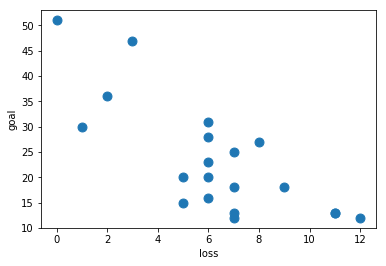

In [84]:
teams_pd.plot.scatter(x='loss', y='goal', s=80)

In [85]:
del teams_pd['name']
teams_pd

,goal,loss
0,12,7
1,12,12
2,36,2
3,13,11
4,27,8
5,28,6
6,20,5
7,30,1
8,31,6
9,13,7


In [86]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 1.09389652,  2.27259552],
       [ 1.09389652,  3.89587803],
       [ 3.28168957,  0.649313  ],
       [ 1.18505457,  3.57122153],
       [ 2.46126718,  2.59725202],
       [ 2.55242522,  1.94793901],
       [ 1.82316087,  1.62328251],
       [ 2.73474131,  0.3246565 ],
       [ 2.82589935,  1.94793901],
       [ 1.18505457,  2.27259552],
       [ 1.4585287 ,  1.94793901],
       [ 1.82316087,  1.94793901],
       [ 4.64906023,  0.        ],
       [ 2.27895109,  2.27259552],
       [ 1.64084479,  2.92190852],
       [ 4.28442805,  0.97396951],
       [ 1.36737066,  1.62328251],
       [ 2.09663501,  1.94793901],
       [ 1.18505457,  3.57122153],
       [ 1.64084479,  2.27259552]])

In [87]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 1.23063359,  3.08423677],
        [ 3.73747979,  0.48698475],
        [ 2.03282437,  2.01287031]]),
 array([0, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 0, 1, 2, 2, 0, 2]))

In [88]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['r',
 'r',
 'g',
 'r',
 'b',
 'b',
 'b',
 'g',
 'b',
 'r',
 'b',
 'b',
 'g',
 'b',
 'r',
 'g',
 'b',
 'b',
 'r',
 'b']

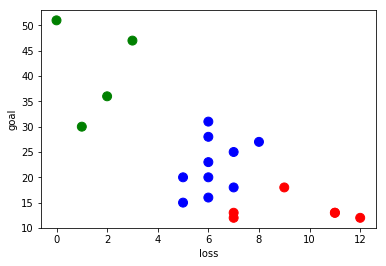

In [89]:
teams_pd.plot.scatter(x='loss', y='goal', c=colors, s=80)

In [90]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[ 1.50410772,  2.11026727],
        [ 3.00821544,  0.48698475],
        [ 2.44303557,  2.14273292],
        [ 4.46674414,  0.48698475],
        [ 1.15466855,  3.67944036]]),
 array([0, 4, 1, 4, 2, 2, 0, 1, 2, 0, 0, 0, 3, 2, 0, 3, 0, 2, 4, 0]))

In [91]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['r',
 'm',
 'g',
 'm',
 'b',
 'b',
 'r',
 'g',
 'b',
 'r',
 'r',
 'r',
 'y',
 'b',
 'r',
 'y',
 'r',
 'b',
 'm',
 'r']

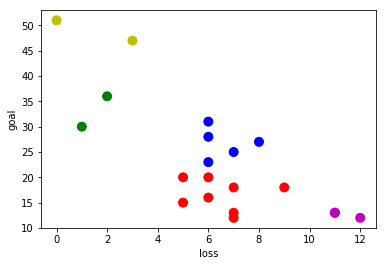

In [92]:
teams_pd.plot.scatter(x='loss', y='goal', c=colors, s=80)